In [72]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from matplotlib import rc
from scipy.signal import resample
from scipy.interpolate import interp1d

rc('mathtext',default='regular')

%matplotlib notebook
#%matplotlib inline

## Function to read in the data

In [73]:
def get_xy_data(filename=None):
    """
    Utility function to retrieve x,y vectors form an ASCII data file.
    It return the first column as x, the second as y.
    Usage:
        x,y = get_xy_data("mydata.txt")
    """
    data = np.loadtxt(filename, usecols=(3,4,5))
    return data


In [74]:
# Read in the data
dat = get_xy_data("clouds_GBT_coord.txt")
print np.shape(dat)

(105, 3)


In [75]:
lon = dat[:,0]
lat = dat[:,1]
vel = dat[:,2]
for i in range(len(lon)):
    if lon[i]>180.0:
        lon[i]=lon[i]-360.0

## Distribution of cloud positions

<IPython.core.display.Javascript object>


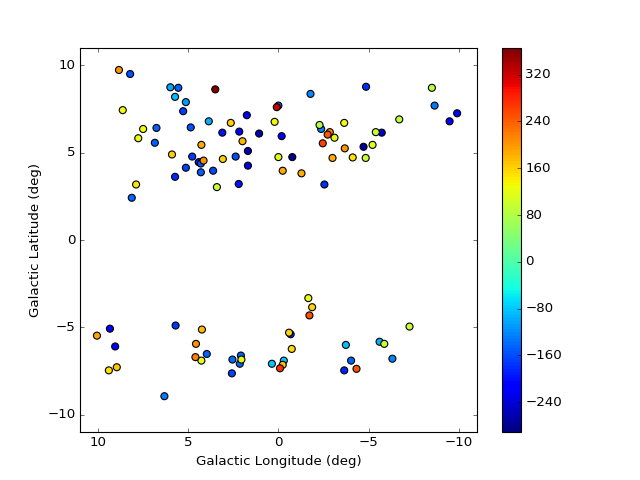

In [76]:
pylab.figure()
CS=pylab.scatter(lon,lat,s=40,c=vel)
pylab.colorbar()
pylab.xlim(11.,-11.)
pylab.ylim(-11.,11.)
pylab.xlabel("Galactic Longitude (deg)")
pylab.ylabel("Galactic Latitude (deg)")



## Distribution of cloud velocities 

<IPython.core.display.Javascript object>


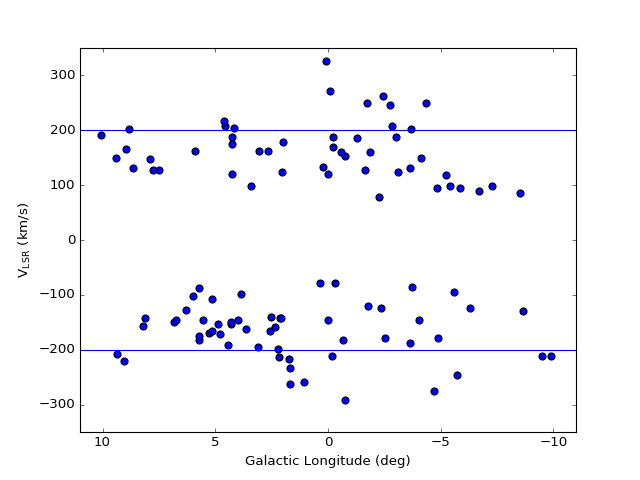

In [77]:
pylab.figure()
CS=pylab.scatter(lon,vel,s=40)
#pylab.colorbar()
pylab.xlim(11.,-11.)
pylab.ylim(-350.,350.)
pylab.xlabel("Galactic Longitude (deg)")
pylab.ylabel("$V_{LSR}$ (km/s)")
pylab.axhline(200.)
pylab.axhline(-200.)
#pylab.scatter(lon,vel,marker='o',linestyle="None")

Note: Trend should be more positive velocities at negative longitudes and negative velocities at positive longitudes simply because of the projection of the solar motion (R0 * sin(l). No evidence of this trend. 

In [78]:
print "Minimum detected cloud velocity %.1f km/s" % min(vel)
print "Maximum detected cloud velocity %.1f km/s"% max(vel)


Minimum detected cloud velocity -291.2 km/s
Maximum detected cloud velocity 365.7 km/s


In [79]:
# Play with some masks
negvel_mask = (lon<=0.0)
print "Mean velocity negative longitudes: "
print np.mean(vel[negvel_mask])
posvel_mask = (lon>0.0)
print "Mean velocity positive longitudes: "
print np.mean(vel[posvel_mask])


Mean velocity negative longitudes: 
23.6147826087
Mean velocity positive longitudes: 
-31.2322033898


## Histogram of Velocities

<IPython.core.display.Javascript object>


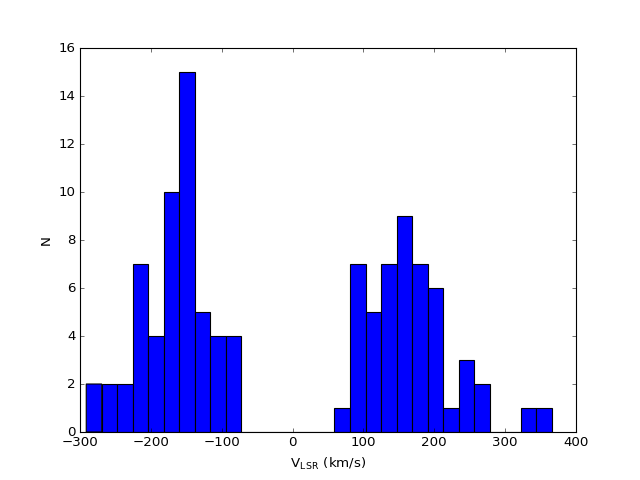

In [80]:
pylab.figure()
n, bins, patches = pylab.hist(vel, 30, facecolor='blue')
pylab.xlabel("$V_{LSR}$ (km/s)")
pylab.ylabel("N")

## Latitude-velocity distribution

<IPython.core.display.Javascript object>


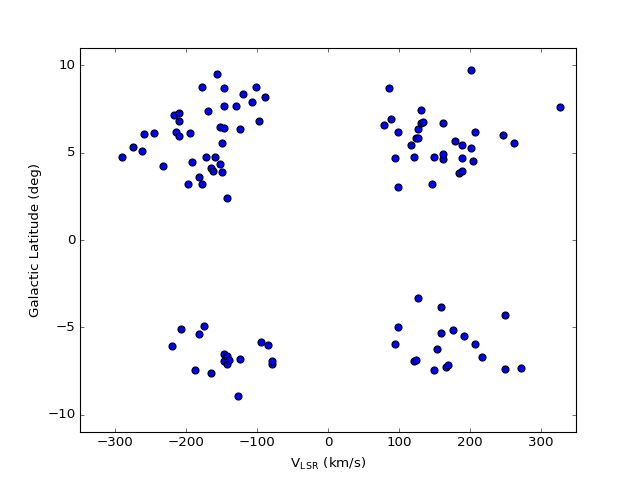

In [84]:
pylab.figure()
CS=pylab.scatter(vel,lat,s=40)
#pylab.colorbar()
pylab.ylim(-11.,11.)
pylab.xlim(-350.,350.)
pylab.ylabel("Galactic Latitude (deg)")
pylab.xlabel("$V_{LSR}$ (km/s)")
pylab.axhline(200.)
pylab.axhline(-200.)
#pylab.scatter(lon,vel,marker='o',linestyle="None")

In [82]:
posvelmask = (vel>0.0)
negvelmask = (vel<0.0)
print sum(negvelmask)

55


## Histogram of Longitudes

<IPython.core.display.Javascript object>


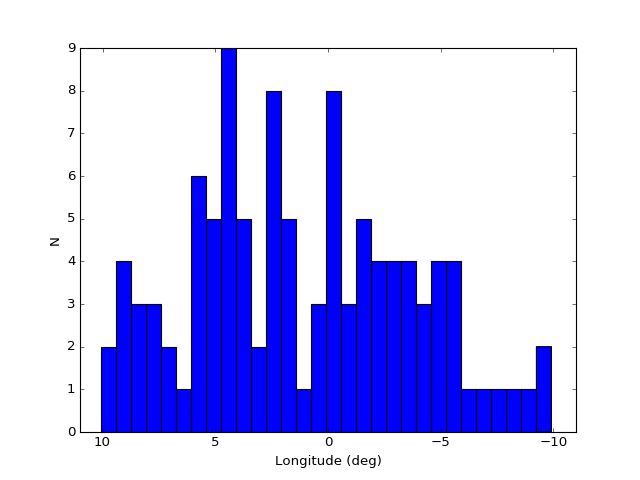

In [83]:
pylab.figure()
n, bins, patches = pylab.hist(lon, 30, facecolor='blue')
pylab.xlabel("Longitude (deg)")
pylab.xlim(11,-11)
pylab.ylabel("N")